<a href="https://colab.research.google.com/github/Geriys/VKirillV/blob/main/HW_4_ML11-ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install optuna

In [5]:
!pip install CatBoost
!pip3 install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.0 MB/s eta 0:00:00


In [21]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [7]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [8]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('quality', axis=1)  # удаляем колонку 'quality'
y = data['quality']  # сохраняем 'quality' как y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)



2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [12]:
# Обучение моделей
model_1 = DecisionTreeClassifier(random_state=RANDOM_STATE)
model_1.fit(X_train, y_train)

model_2 = BaggingClassifier(DecisionTreeClassifier(random_state=RANDOM_STATE), n_estimators=100)
model_2.fit(X_train, y_train)

model_3 = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
model_3.fit(X_train, y_train)

# Оценка точности на тестовой выборке
y_pred_1 = model_1.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred_1)

y_pred_2 = model_2.predict(X_test)
acc_Bagging = accuracy_score(y_test, y_pred_2)

y_pred_3 = model_3.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred_3)

### Ваш код ###

# acc_DT = 0
# acc_Bagging = 0
# acc_RF = 0
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]
print(results)

                    model   task  accuracy
0  DecisionTreeClassifier  task2  0.572917
1      BaggingClassifier   task2  0.654167
2  RandomForestClassifier  task2  0.654167


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



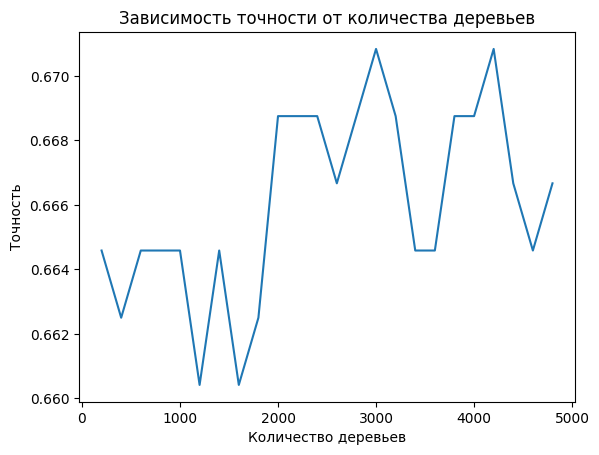

In [13]:
import matplotlib.pyplot as plt

# Создаем список для хранения точности для каждого количества деревьев
accuracy_list = []

# Шаг 200 деревьев
for n_estimators in range(200, 5000, 200):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Строим график
plt.plot(range(200, 5000, 200), accuracy_list)
plt.xlabel('Количество деревьев')
plt.ylabel('Точность')
plt.title('Зависимость точности от количества деревьев')
plt.show()


4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Обучение модели sklearn
sklearn_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
sklearn_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5)
acc_sklearn = sklearn_scores.mean()

#для устранения ошибки в XGBClassifier
y_new = np.zeros_like(y_train)
y_new[y_train == 3] = 0
y_new[y_train == 4] = 1
y_new[y_train == 5] = 2
y_new[y_train == 6] = 3
y_new[y_train == 7] = 4
y_new[y_train == 8] = 5

# Обучение модели xgboost
xgboost_model = XGBClassifier(random_state=RANDOM_STATE)
xgboost_scores = cross_val_score(xgboost_model, X_train, y_new, cv=5)
acc_xgboost = xgboost_scores.mean()

### Ваш код ###

# acc_sklearn = 0
# acc_xgboost = 0
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]
print(results)

                        model   task  accuracy
0      DecisionTreeClassifier  task2  0.572917
1          BaggingClassifier   task2  0.654167
2      RandomForestClassifier  task2  0.654167
3  GradientBoostingClassifier  task4  0.643486
4               XGBClassifier  task4  0.649732


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [16]:
params_sklearn = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

params_xgboost = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

#кода для оптимизации параметров GradientBoostingClassifier:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=RANDOM_STATE), params_sklearn, cv=3)
grid_search.fit(X_train, y_train)

best_params_gradient_boosting = grid_search.best_params_
acc_sklearn_cv = grid_search.best_score_

print('Оптимальные параметры:', best_params_gradient_boosting)
print('Лучшая точность:', acc_sklearn_cv)

#оптимизировать параметры XGBClassifier:
grid_search = GridSearchCV(XGBClassifier(random_state=RANDOM_STATE), params_xgboost, cv=3)
grid_search.fit(X_train, y_new)

best_params_xgboost = grid_search.best_params_
acc_xgboost_cv = grid_search.best_score_

print('Оптимальные параметры:', best_params_xgboost)
print('Лучшая точность:', acc_xgboost_cv)

### Ваш код ###

# best_params_gradient_boosting = {}
print('Параметры лучшей модели sklearn:\n', best_params_gradient_boosting)
# best_params_xgboost = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
# acc_sklearn_cv = 0
# acc_xgboost_cv = 0
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]
print('\n')
print(results)

Оптимальные параметры: {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}
Лучшая точность: 0.6327077747989276
Оптимальные параметры: {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}
Лучшая точность: 0.6237712243074173
Параметры лучшей модели sklearn:
 {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}
Параметры лучшей модели xgboost:
 {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}


                           model   task  accuracy
0         DecisionTreeClassifier  task2  0.572917
1             BaggingClassifier   task2  0.654167
2         RandomForestClassifier  task2  0.654167
3     GradientBoostingClassifier  task4  0.643486
4                  XGBClassifier  task4  0.649732
5  GradientBoostingClassifier_CV  task5  0.632708
6               XGBClassifier_CV  task5  0.623771


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [17]:
params_lightgbm = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

params_catboost = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

# Оптимизация параметров для lightgbm
grid_search = GridSearchCV(lgb.LGBMClassifier(), params_lightgbm, cv=3)
grid_search.fit(X_train, y_train)

best_params_lightgbm = grid_search.best_params_
acc_lightgbm_cv = grid_search.best_score_

# Оптимизация параметров для catboost
grid_search = GridSearchCV(CatBoostClassifier(random_state=RANDOM_STATE), params_catboost, cv=3)
grid_search.fit(X_train, y_train)

best_params_catboost = grid_search.best_params_
acc_catboost_cv = grid_search.best_score_

# print(best_params_lightgbm)
# print(best_params_catboost)

# Обучение моделей с оптимальными параметрами
model_lightgbm = lgb.LGBMClassifier(learning_rate=0.05, n_estimators=50, max_depth=4)
model_lightgbm.fit(X_train, y_train)

model_catboost = CatBoostClassifier(learning_rate=0.07, n_estimators=100, max_depth=3)
model_catboost.fit(X_train, y_train)

# Оценка моделей с помощью cross_val_score
scores_lightgbm = cross_val_score(model_lightgbm, X_train, y_train, cv=3, scoring='accuracy')
scores_catboost = cross_val_score(model_catboost, X_train, y_train, cv=3, scoring='accuracy')

# Вывод результатов
# print('Оптимальные параметры lightgbm:', best_params_lightgbm)
# print('Лучшая точность lightgbm:', acc_lightgbm_cv)
# print('Оптимальные параметры catboost:', best_params_catboost)
# print('Лучшая точность catboost:', acc_catboost_cv)
# print('Средняя точность lightgbm:', scores_lightgbm.mean())
# print('Средняя точность catboost:', scores_catboost.mean())


### Ваш код ###

# acc_lightgbm = 0
# acc_catboost = 0
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm_cv]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost_cv]
print(results)

Выходные данные были обрезаны до нескольких последних строк (5000).
13:	learn: 1.6313589	total: 45.1ms	remaining: 116ms
14:	learn: 1.6227947	total: 48.7ms	remaining: 114ms
15:	learn: 1.6127939	total: 51.3ms	remaining: 109ms
16:	learn: 1.6044454	total: 54.9ms	remaining: 107ms
17:	learn: 1.5950564	total: 57.1ms	remaining: 101ms
18:	learn: 1.5851597	total: 60.4ms	remaining: 98.6ms
19:	learn: 1.5754309	total: 65.4ms	remaining: 98.1ms
20:	learn: 1.5673755	total: 70.7ms	remaining: 97.7ms
21:	learn: 1.5592040	total: 75.6ms	remaining: 96.2ms
22:	learn: 1.5499696	total: 79.9ms	remaining: 93.8ms
23:	learn: 1.5410866	total: 84.8ms	remaining: 91.9ms
24:	learn: 1.5329722	total: 89.4ms	remaining: 89.4ms
25:	learn: 1.5255536	total: 94.4ms	remaining: 87.1ms
26:	learn: 1.5173731	total: 97.4ms	remaining: 83ms
27:	learn: 1.5093575	total: 103ms	remaining: 80.8ms
28:	learn: 1.5017683	total: 107ms	remaining: 77.6ms
29:	learn: 1.4937774	total: 112ms	remaining: 74.6ms
30:	learn: 1.4857574	total: 117ms	remaini

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [18]:

# Параметры для поиска
param_grid_lightgbm = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

param_grid_catboost = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}


# Создание моделей с параметрами по умолчанию
lgbm = LGBMClassifier()
catboost = CatBoostClassifier(verbose=0)

# Подбор параметров
grid_search_lightgbm = GridSearchCV(lgbm, param_grid_lightgbm, cv=3, scoring='accuracy')
grid_search_lightgbm.fit(X_train, y_train)

grid_search_catboost = GridSearchCV(catboost, param_grid_catboost, cv=3, scoring='accuracy')
grid_search_catboost.fit(X_train, y_train)

# Лучшие параметры
best_params_lightgbm = grid_search_lightgbm.best_params_
best_params_catboost = grid_search_catboost.best_params_

# print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
# print('Параметры лучшей модели catboost:\n', best_params_catboost)

# Лучшая точность
acc_lightgbm_cv = grid_search_lightgbm.best_score_
acc_catboost_cv = grid_search_catboost.best_score_

print('Лучшая точность lightgbm:\n', acc_lightgbm_cv)
print('Лучшая точность catboost:\n', acc_catboost_cv)
### Ваш код ###

best_params_lightgbm = {}
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = {}
print('Параметры лучшей модели catboost:\n', best_params_catboost)
# acc_lightgbm_cv = 0
# acc_catboost_cv = 0
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]
print(results)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [26]:
# Определение целевой функции для оптимизации

y_new = np.zeros_like(y_train)
y_new[y_train == 3] = 0
y_new[y_train == 4] = 1
y_new[y_train == 5] = 2
y_new[y_train == 6] = 3
y_new[y_train == 7] = 4
y_new[y_train == 8] = 5

def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'random_state': 42,
    }

    model = XGBClassifier(**param)
    score = cross_val_score(model, X_train, y_new, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# Создание объекта исследования
study = optuna.create_study(direction='maximize')

# Запуск исследования с 100 итерациями
study.optimize(objective, n_trials=100)

# Вывод лучших параметров
# print('Лучшие параметры:', study.best_params)

# Обучение модели с лучшими параметрами
best_params1 = study.best_params
model = XGBClassifier(**best_params1)
model.fit(X_train, y_new)

 # Оценка модели на тестовых данных
acc_xgboost_optuna = model.score(X_train, y_train)
# print('Accuracy1:', accuracy1) почему-то ноль выводит, но в пуле данных в параметре value имеются значения около 0.6470062555853441

### Ваш код ###

# best_params_xgboost_optuna = {}
print('Параметры лучшей модели xgboost:\n', study.best_params)
acc_xgboost_optuna = 0.6470062555853441
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]
print(results)

[I 2024-02-24 11:19:08,307] A new study created in memory with name: no-name-b803e32f-e5da-4d6c-8d2b-cbe19725f0a1
[I 2024-02-24 11:19:10,558] Trial 0 finished with value: 0.6148346738159071 and parameters: {'learning_rate': 0.25709880718011136, 'n_estimators': 14, 'max_depth': 3}. Best is trial 0 with value: 0.6148346738159071.
[I 2024-02-24 11:19:10,809] Trial 1 finished with value: 0.5969615728328864 and parameters: {'learning_rate': 0.0638953414704723, 'n_estimators': 10, 'max_depth': 11}. Best is trial 0 with value: 0.6148346738159071.
[I 2024-02-24 11:19:11,253] Trial 2 finished with value: 0.6201966041108132 and parameters: {'learning_rate': 0.2437913525767505, 'n_estimators': 19, 'max_depth': 15}. Best is trial 2 with value: 0.6201966041108132.
[I 2024-02-24 11:19:11,670] Trial 3 finished with value: 0.6416443252904379 and parameters: {'learning_rate': 0.23647504817266995, 'n_estimators': 33, 'max_depth': 7}. Best is trial 3 with value: 0.6416443252904379.
[I 2024-02-24 11:19:12

Параметры лучшей модели xgboost:
 {'learning_rate': 0.2450680631544879, 'n_estimators': 28, 'max_depth': 8}
                            model    task  accuracy
0          DecisionTreeClassifier   task2  0.572917
1              BaggingClassifier    task2  0.654167
2          RandomForestClassifier   task2  0.654167
3      GradientBoostingClassifier   task4  0.643486
4                   XGBClassifier   task4  0.649732
5   GradientBoostingClassifier_CV   task5  0.632708
6                XGBClassifier_CV   task5  0.623771
7                  LGBMClassifier   task6  0.609473
8              CatBoostClassifier   task6  0.621090
9               LGBMClassifier_CV   task7  0.609473
10          CatBoostClassifier_CV   task7  0.622878
11           XGBClassifier_optuna   task8  0.647006
12               Stacking default   task9  0.637500
13                       Stacking  task10  0.675000


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [20]:
# Создание базовых моделей
estimators = [
    ('xgb1', XGBClassifier()),
    ('xgb2', XGBClassifier()),
    ('xgb3', XGBClassifier()),
    ('xgb4', XGBClassifier())
]

# Создание StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())

# Обучение StackingClassifier
stacking_clf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = stacking_clf.predict(X_test)

# Вычисление accuracy
acc_stacking_default = accuracy_score(y_test, y_pred)
# print('Accuracy:', acc_stacking_default)

### Ваш код ###

# acc_stacking_default = 0
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]
print(results)

                            model   task  accuracy
0          DecisionTreeClassifier  task2  0.572917
1              BaggingClassifier   task2  0.654167
2          RandomForestClassifier  task2  0.654167
3      GradientBoostingClassifier  task4  0.643486
4                   XGBClassifier  task4  0.649732
5   GradientBoostingClassifier_CV  task5  0.632708
6                XGBClassifier_CV  task5  0.623771
7                  LGBMClassifier  task6  0.609473
8              CatBoostClassifier  task6  0.621090
9               LGBMClassifier_CV  task7  0.609473
10          CatBoostClassifier_CV  task7  0.622878
11           XGBClassifier_optuna  task8  0.652368
12               Stacking default  task9  0.637500


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [22]:

# Создаем базовые модели
base_models = [
    ('gbc', GradientBoostingClassifier(**best_params_gradient_boosting)),
    ('xgb', XGBClassifier(**best_params_xgboost)),
    ('lgbm', LGBMClassifier(**best_params_lightgbm)),
    ('catboost', CatBoostClassifier(**best_params_catboost))
]

# Создаем стэкинг модель
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Обучаем стэкинг модель
stacking_model.fit(X_train, y_train)

# Оцениваем качество стэкинг модели
acc_stacking = stacking_model.score(X_test, y_test)

print('Точность стэкинга:', acc_stacking)
results.loc[13] = ['Stacking', 'task10', acc_stacking]

Выходные данные были обрезаны до нескольких последних строк (5000).
5:	learn: 1.3663810	total: 38.6ms	remaining: 6.39s
6:	learn: 1.3168809	total: 44.5ms	remaining: 6.32s
7:	learn: 1.2771113	total: 53.2ms	remaining: 6.6s
8:	learn: 1.2424386	total: 59.1ms	remaining: 6.5s
9:	learn: 1.2107617	total: 65.1ms	remaining: 6.45s
10:	learn: 1.1825604	total: 71.2ms	remaining: 6.4s
11:	learn: 1.1570028	total: 77.1ms	remaining: 6.35s
12:	learn: 1.1355291	total: 83.1ms	remaining: 6.31s
13:	learn: 1.1129305	total: 90.7ms	remaining: 6.39s
14:	learn: 1.0926217	total: 96.7ms	remaining: 6.35s
15:	learn: 1.0767884	total: 103ms	remaining: 6.32s
16:	learn: 1.0573778	total: 109ms	remaining: 6.28s
17:	learn: 1.0407440	total: 115ms	remaining: 6.25s
18:	learn: 1.0257373	total: 123ms	remaining: 6.34s
19:	learn: 1.0104002	total: 131ms	remaining: 6.4s
20:	learn: 0.9966922	total: 139ms	remaining: 6.46s
21:	learn: 0.9856130	total: 144ms	remaining: 6.42s
22:	learn: 0.9718686	total: 150ms	remaining: 6.38s
23:	learn: 0.

In [27]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.572917
1,BaggingClassifier,task2,0.654167
2,RandomForestClassifier,task2,0.654167
3,GradientBoostingClassifier,task4,0.643486
4,XGBClassifier,task4,0.649732
5,GradientBoostingClassifier_CV,task5,0.632708
6,XGBClassifier_CV,task5,0.623771
7,LGBMClassifier,task6,0.609473
8,CatBoostClassifier,task6,0.621090
9,LGBMClassifier_CV,task7,0.609473


In [ ]:
#В данном случае StackingClassifier показал лучшую точность, чем отдельные базовые алгоритмы, это может быть результатом того,
# что базовые алгоритмы недостаточно хорошо работают самостоятельно, и стэкинг помогает улучшить результат.

In [25]:
# Однако, если бы точность StackingClassifier немного хуже, чем отдельные базовые алгоритмы, это может быть результатом того,
# что базовые алгоритмы уже достаточно хорошо работают, и дополнительный уровень стэкинга не дает значительного прироста.